In [9]:
!pip install seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/A1_9057ecca-1398-431b-a3f9-43d429368e9a.csv')

print("Columns in dataset:")
print(df.columns.tolist())

print("First 5 rows of the dataset:")
print(df.head())

# a. Frequency of samples for each class
print("\nFrequency of samples for each class:")
print(df['Classes'].value_counts())



Columns in dataset:
['Sample Number', 'Classes', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Sex']
First 5 rows of the dataset:
   Sample Number Classes  Feature 1  Feature 2  Feature 3  Feature 4     Sex
0              1       A       39.2       18.6        190       4250    MALE
1              2       B       45.2       13.8        215       4750  FEMALE
2              3       C       51.9       19.5        206       3950    MALE
3              4       A       42.8       18.5        195       4250    MALE
4              5       B       42.6       13.7        213       4950  FEMALE

Frequency of samples for each class:


In [10]:
# b. Data description and Interquartile Range (IQR) for all features
print("\nData Description:")
print(df.describe())

print("\nInterquartile Range (IQR):")
iqr = df.describe().loc['75%'] - df.describe().loc['25%']
print(iqr)




Data Description:
       Sample Number   Feature 1   Feature 2   Feature 3    Feature 4
count     342.000000  342.000000  342.000000  342.000000   342.000000
mean      171.500000   43.921930   17.151170  200.915205  4201.754386
std        98.871128    5.459584    1.974793   14.061714   801.954536
min         1.000000   32.100000   13.100000  172.000000  2700.000000
25%        86.250000   39.225000   15.600000  190.000000  3550.000000
50%       171.500000   44.450000   17.300000  197.000000  4050.000000
75%       256.750000   48.500000   18.700000  213.000000  4750.000000
max       342.000000   59.600000   21.500000  231.000000  6300.000000

Interquartile Range (IQR):
Sample Number     170.500
Feature 1           9.275
Feature 2           3.100
Feature 3          23.000
Feature 4        1200.000
dtype: float64


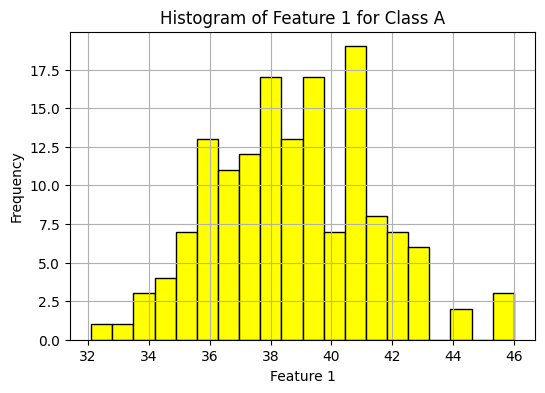

In [13]:
# c. Histogram of Feature 1 for Class A
plt.figure(figsize=(6,4))
df[df['Classes'] == 'A']['Feature 1'].hist(bins=20, color='red', edgecolor='black')
plt.title('Histogram of Feature1 for Class A')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



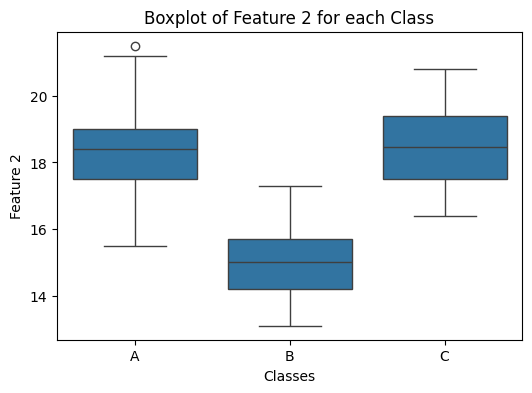

In [14]:
# d. Box plot for Feature 2 for each class
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Classes', y='Feature 2')
plt.title('Boxplot of Feature 2 for each Class')
plt.show()



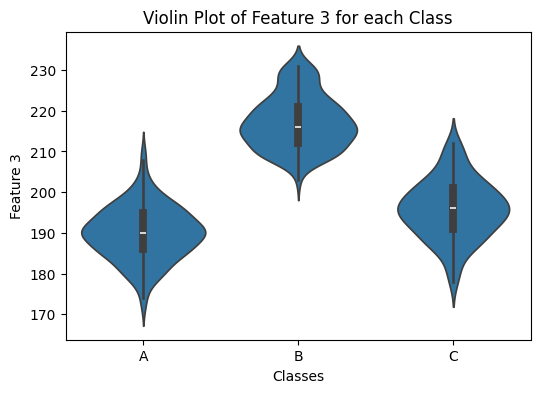

In [15]:
# e. Violin plot for Feature 3 for each class
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='Classes', y='Feature 3', inner='box')
plt.title('Violin Plot of Feature 3 for each Class')
plt.show()



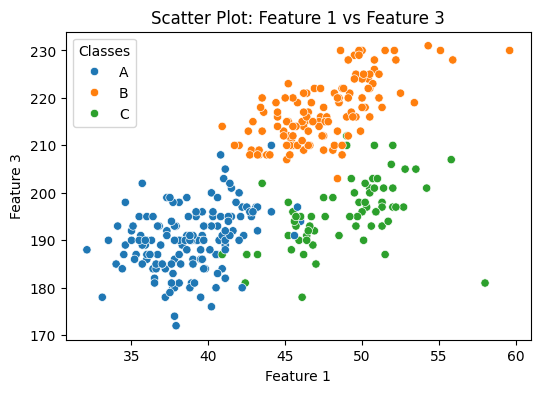

In [16]:
# f. Scatter plot between Feature1 and Feature3 showing classes separately
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Feature 1', y='Feature 3', hue='Classes')
plt.title('Scatter Plot: Feature 1 vs Feature 3')
plt.show()



<ipython-input-17-afc594a498fe>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


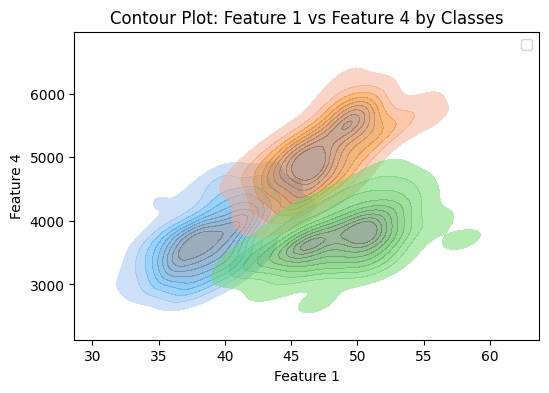

In [17]:
# g. Contour plot between Feature1 and Feature4 by Class
plt.figure(figsize=(6,4))
for label in df['Classes'].unique():
    subset = df[df['Classes'] == label]
    sns.kdeplot(x=subset['Feature 1'], y=subset['Feature 4'], fill=True, alpha=0.5, label=f'Classes {label}')
plt.title('Contour Plot: Feature 1 vs Feature 4 by Classes')
plt.legend()
plt.show()



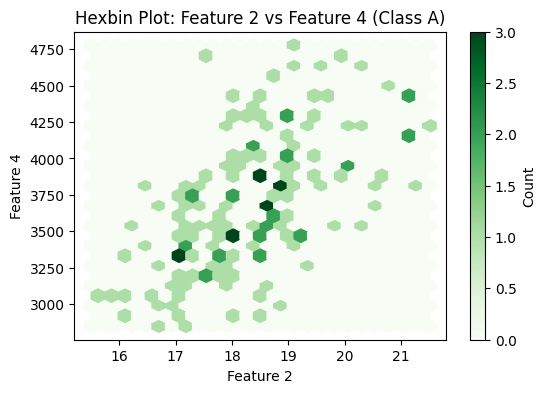

In [19]:
# h. Hexbin plot for Class A between Feature2 and Feature4
plt.figure(figsize=(6,4))
subset_A = df[df['Classes'] == 'A']
plt.hexbin(subset_A['Feature 2'], subset_A['Feature 4'], gridsize=25, cmap='Greens')
plt.colorbar(label='Count')
plt.xlabel('Feature 2')
plt.ylabel('Feature 4')
plt.title('Hexbin Plot: Feature 2 vs Feature 4 (Class A)')
plt.show()



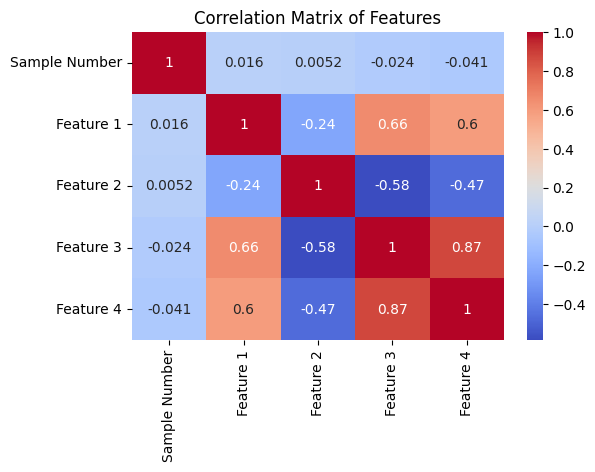

In [20]:
# i. Correlation matrix (only numeric columns)
corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

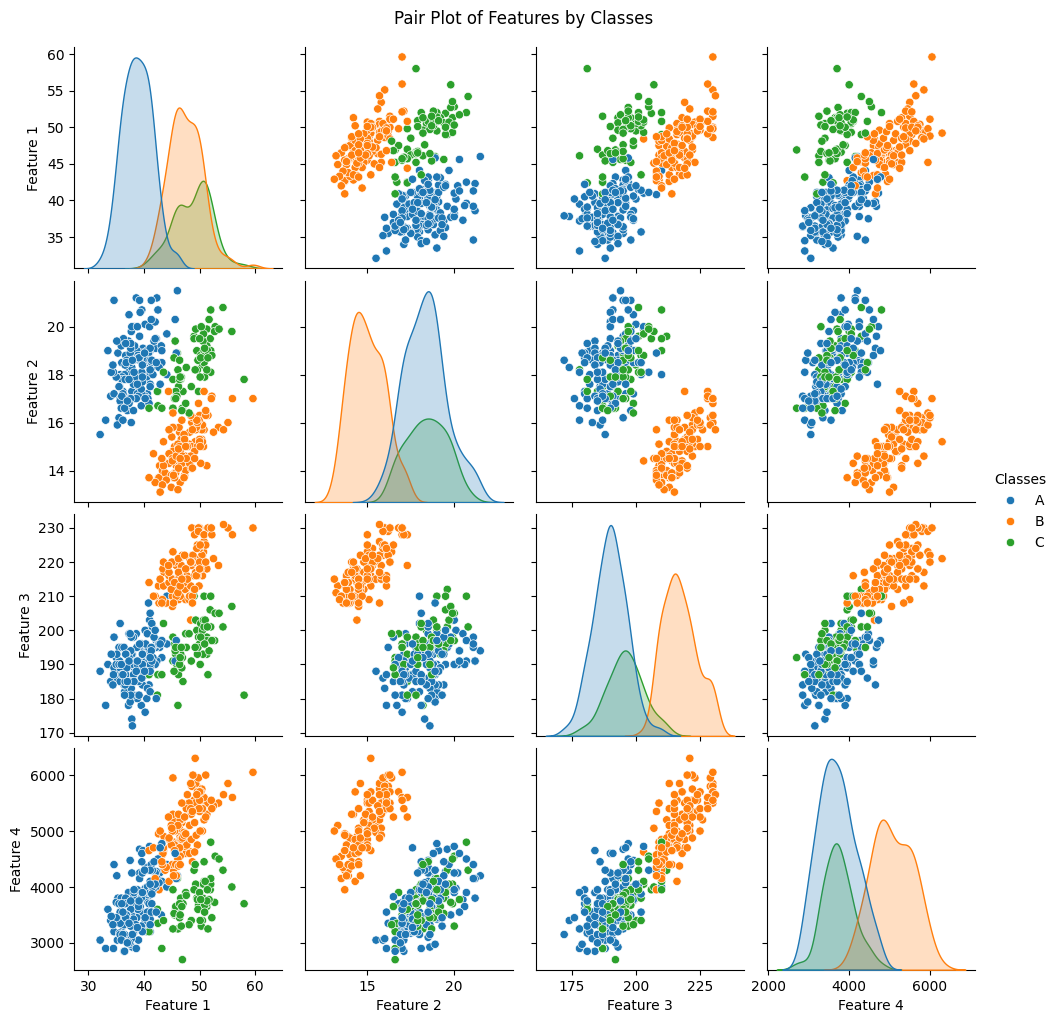

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# j. Pair plot of the four features showing classes separately

pair_plot = sns.pairplot(df, hue='Classes', vars=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])

pair_plot.fig.suptitle('Pair Plot of Features by Classes', y=1.02)
pair_plot.savefig("pairplot.png")
files.download("pairplot.png")
